In [91]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.diagnostic as diag
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import sklearn.preprocessing

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [92]:
# Global Variables
seed = random.seed(123)
number_clusters = 3

# Analisis Exploratorio

In [93]:
# Variable classification
train_data = pd.read_csv('./data/train.csv', encoding = "ISO-8859-1")
test_data = pd.read_csv('./data/test.csv', encoding = "ISO-8859-1")
variables = pd.read_csv('./data/variables.txt', encoding = "ISO-8859-1")
quant_vars = list(variables.loc[(variables['Clasification'] == 'Cuantitativa')]['Variable'].values)
quali_vars = list(variables.loc[(variables['Clasification'] == 'Cualitativa')]['Variable'].values)[1:]

### Analizando las variables numericas

In [94]:
train_data[quant_vars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


LotFrontage: Kurtosis: 17.375300497599614 Skewness: 2.160865994705543 

LotArea: Kurtosis: 202.5437927513529 Skewness: 12.195142125084478 

MasVnrArea: Kurtosis: 10.04360232122905 Skewness: 2.6663261001607435 

BsmtFinSF1: Kurtosis: 11.076089857631942 Skewness: 1.6837708962341815 

BsmtFinSF2: Kurtosis: 20.04041549471293 Skewness: 4.250888017057445 

BsmtUnfSF: Kurtosis: 0.4692620789683075 Skewness: 0.9193227015582005 

TotalBsmtSF: Kurtosis: 13.201041630635025 Skewness: 1.522688086978629 

1stFlrSF: Kurtosis: 5.722076026587489 Skewness: 1.3753417421837937 

2ndFlrSF: Kurtosis: -0.5556767272864769 Skewness: 0.8121942731961613 

LowQualFinSF: Kurtosis: 82.945932358931 Skewness: 9.002080417658552 

GrLivArea: Kurtosis: 4.874265760253215 Skewness: 1.365155954773434 

BsmtFullBath: Kurtosis: -0.8403341716305701 Skewness: 0.5954540376067279 

BsmtHalfBath: Kurtosis: 16.33643610470807 Skewness: 4.0991856695420035 

FullBath: Kurtosis: -0.8582173323828637 Skewness: 0.0365239844325461 

HalfBa

C:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


GarageArea: Kurtosis: 0.9098227950882034 Skewness: 0.1797959420587727 

WoodDeckSF: Kurtosis: 2.978604140391349 Skewness: 1.5397916998042025 

OpenPorchSF: Kurtosis: 8.457180405184337 Skewness: 2.361911928568972 

EnclosedPorch: Kurtosis: 10.39097160371135 Skewness: 3.086696471376678 

3SsnPorch: Kurtosis: 123.23517727268867 Skewness: 10.293752357165413 

ScreenPorch: Kurtosis: 18.371874098863685 Skewness: 4.1179773827954875 

PoolArea: Kurtosis: 222.500506832132 Skewness: 14.813134660429398 

MiscVal: Kurtosis: 698.6008400387273 Skewness: 24.4516396173223 

SalePrice: Kurtosis: 6.509812011089439 Skewness: 1.880940746034036 



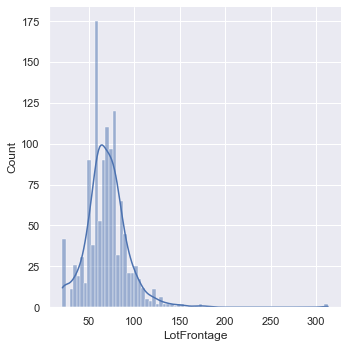

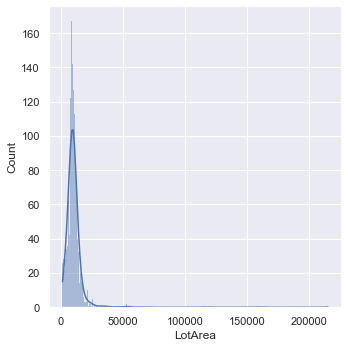

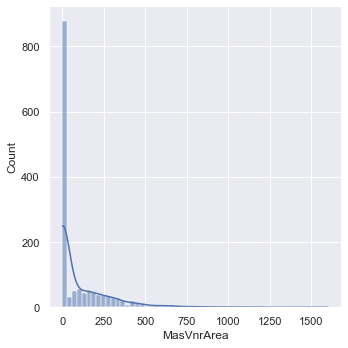

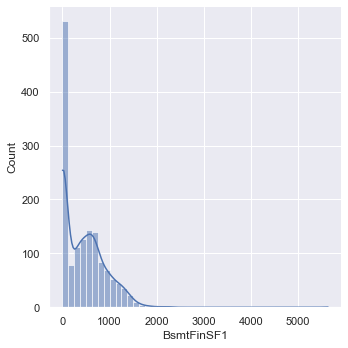

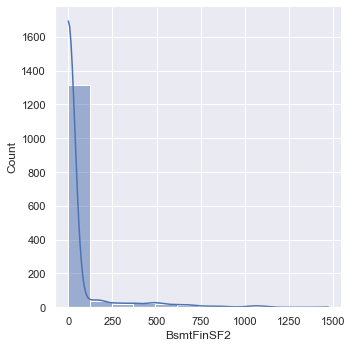

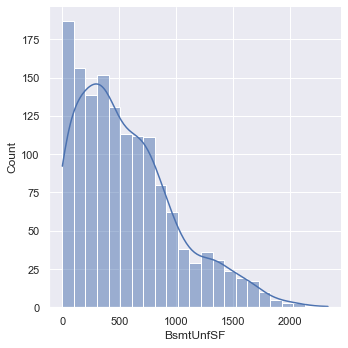

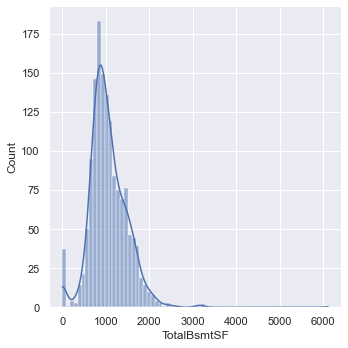

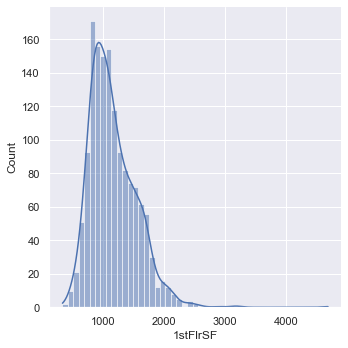

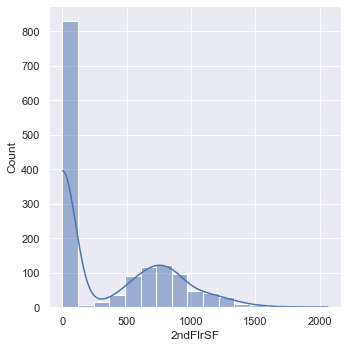

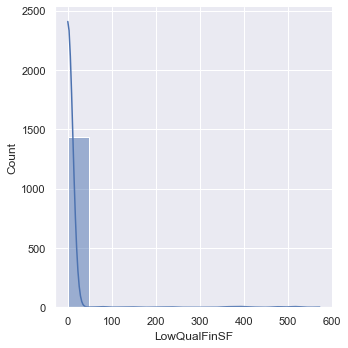

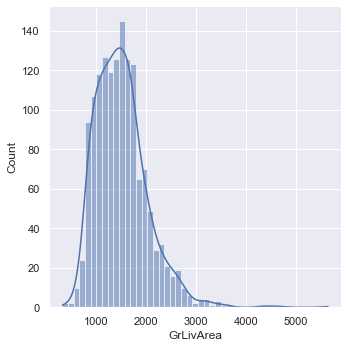

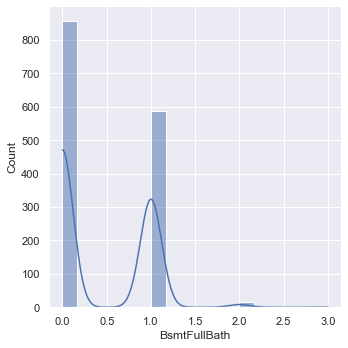

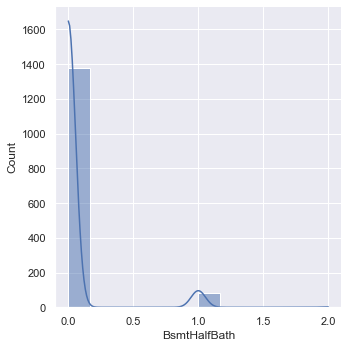

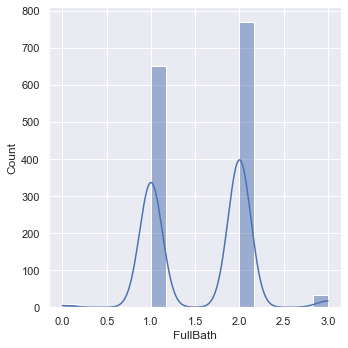

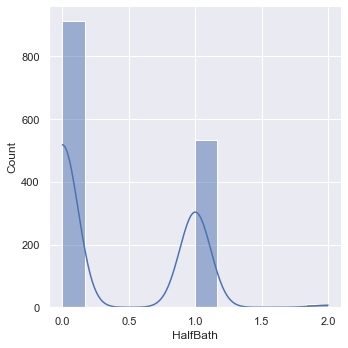

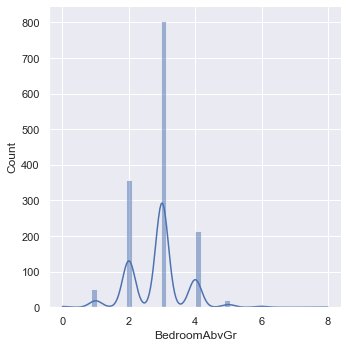

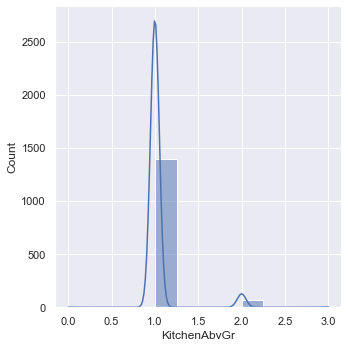

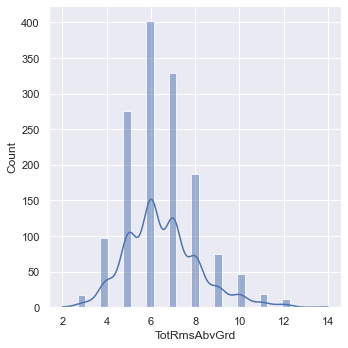

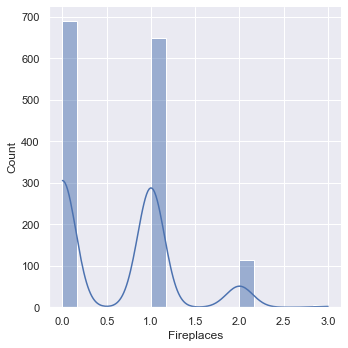

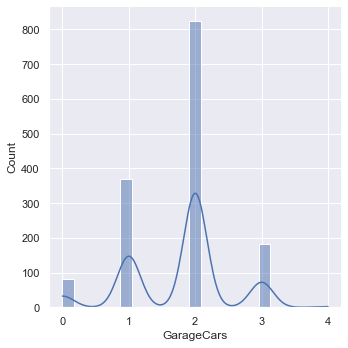

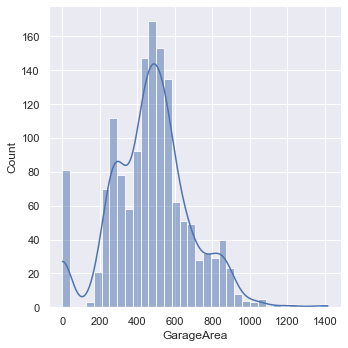

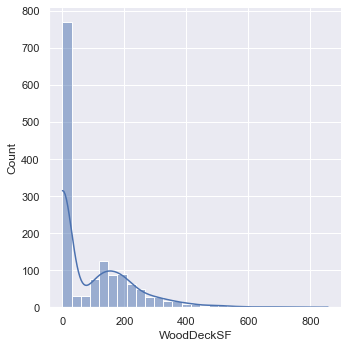

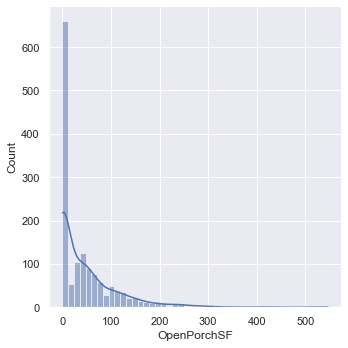

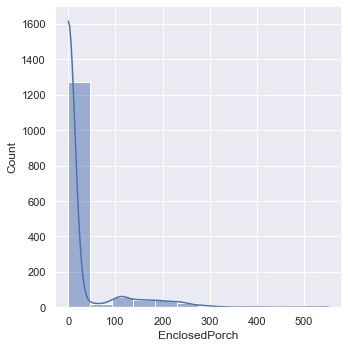

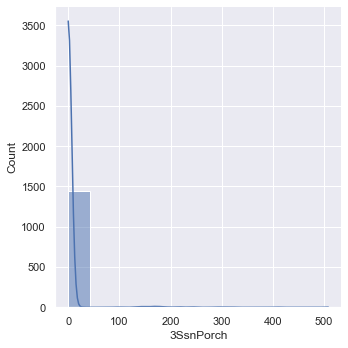

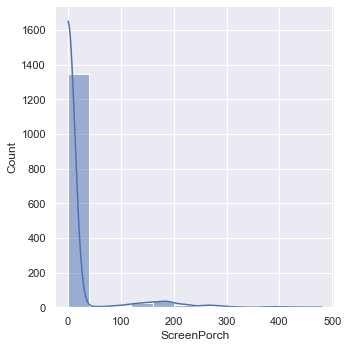

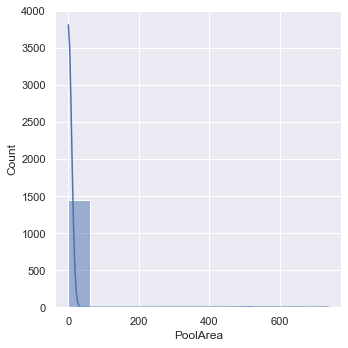

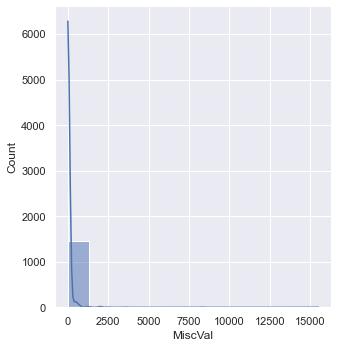

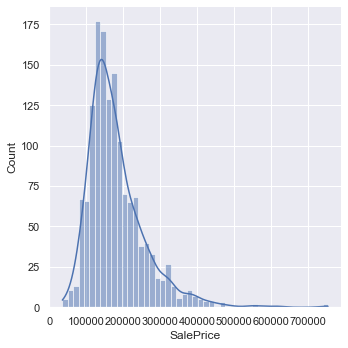

In [95]:
for var in quant_vars:
    data = train_data[var].dropna(how='all', axis=0)
    
    # Gráfico
    sns.displot(data, kde=True)

    # Mostrando normalidad
    print('\033[1m' + var + '\033[0m' + ': Kurtosis:', stats.kurtosis(data), 'Skewness:', stats.skew(data), '\n')

### Analizando las variables categoricas

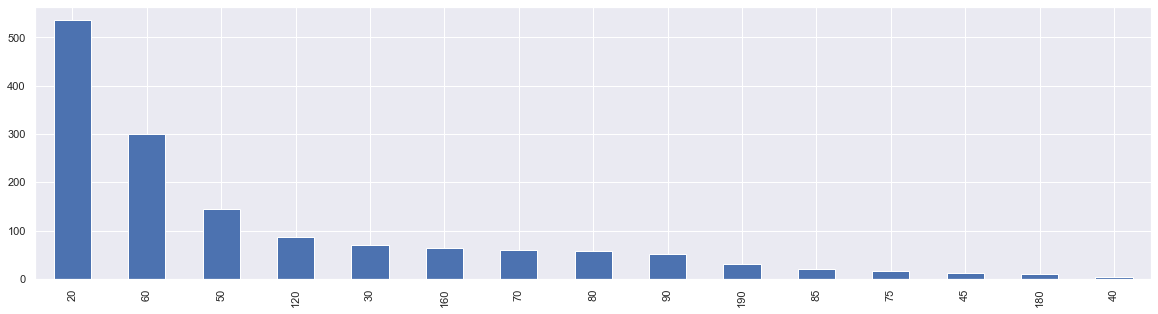

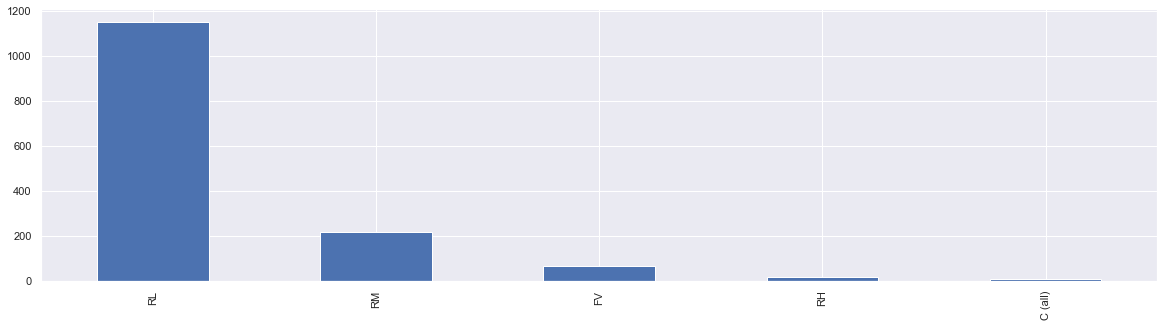

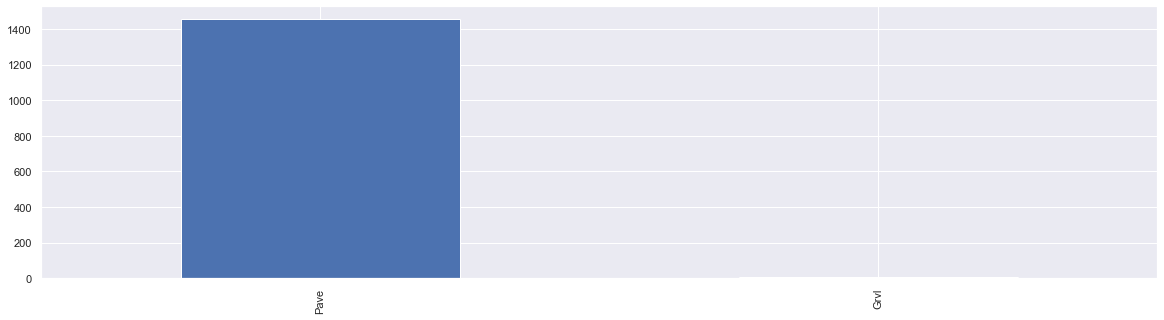

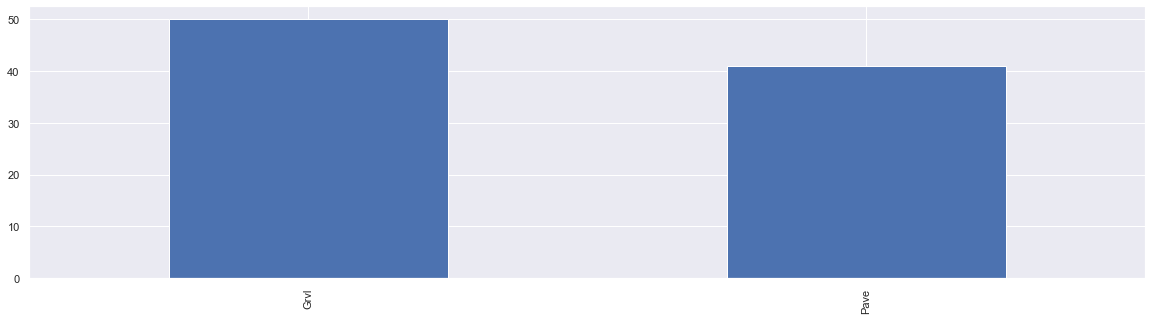

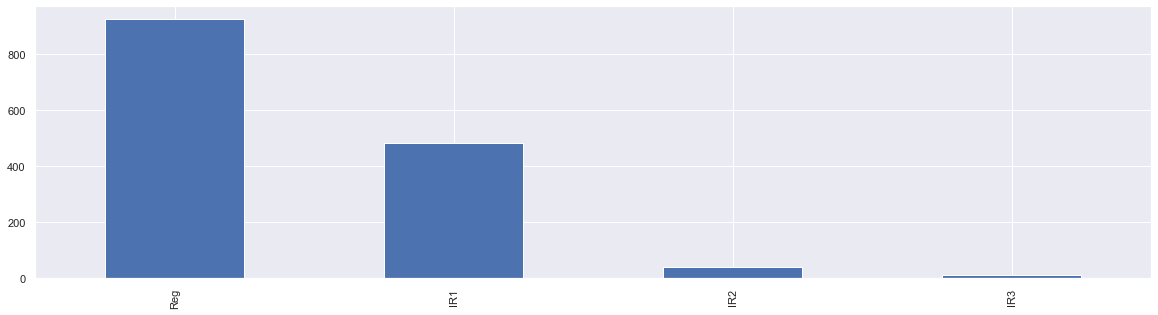

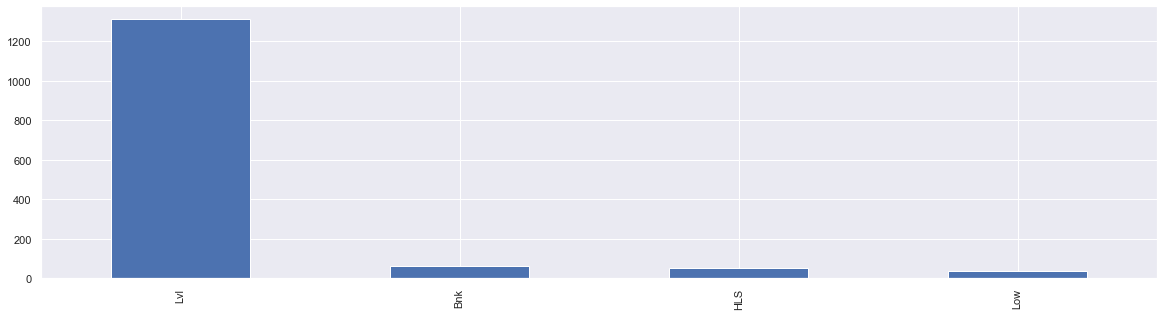

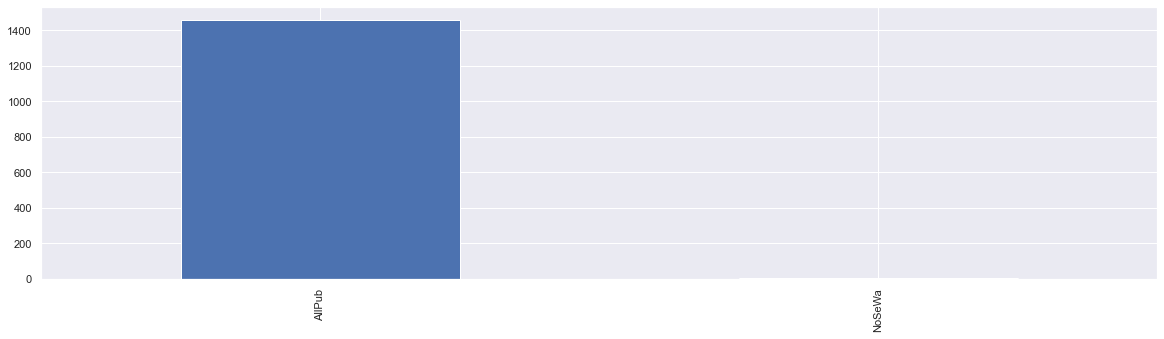

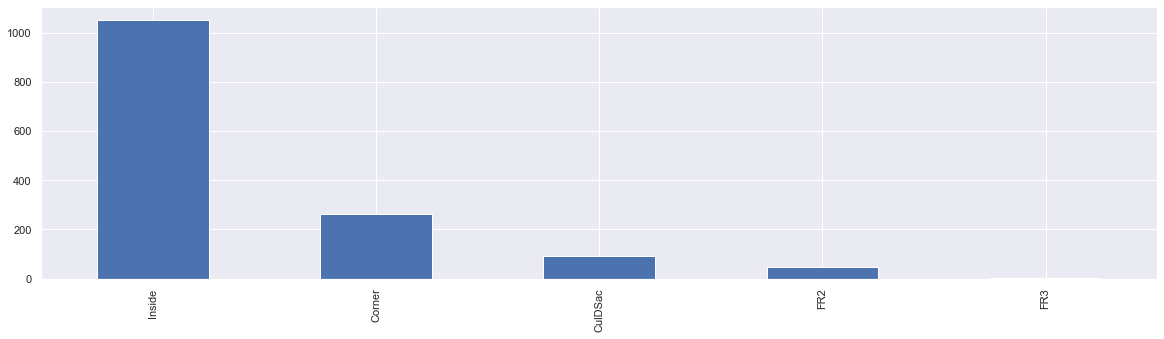

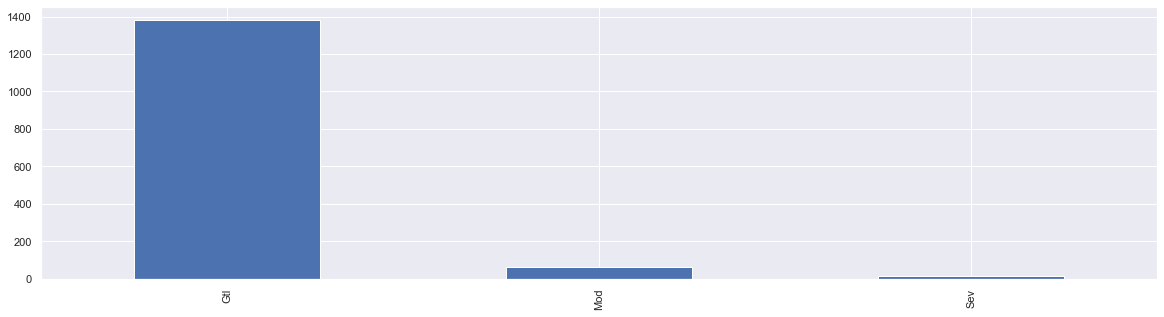

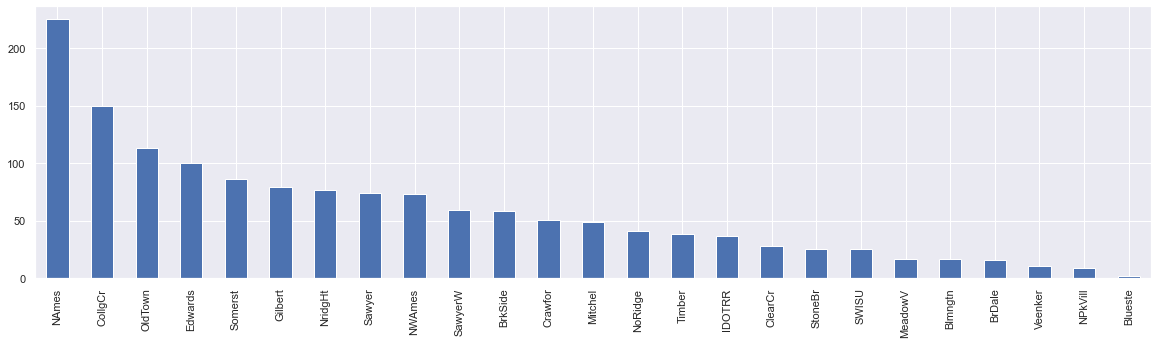

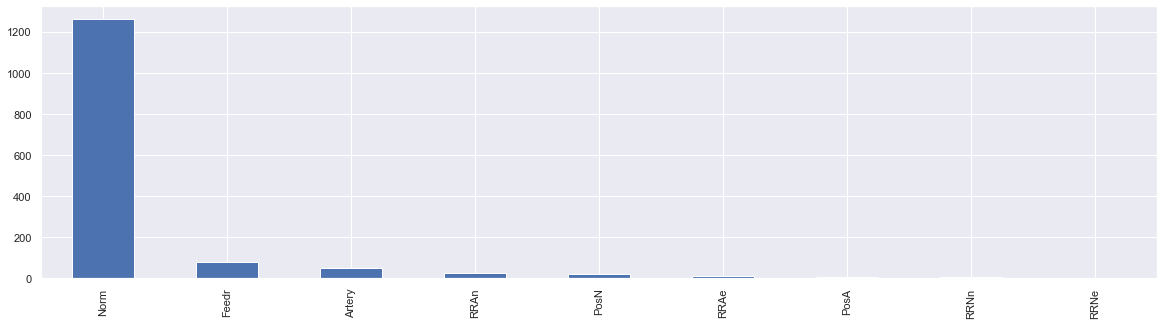

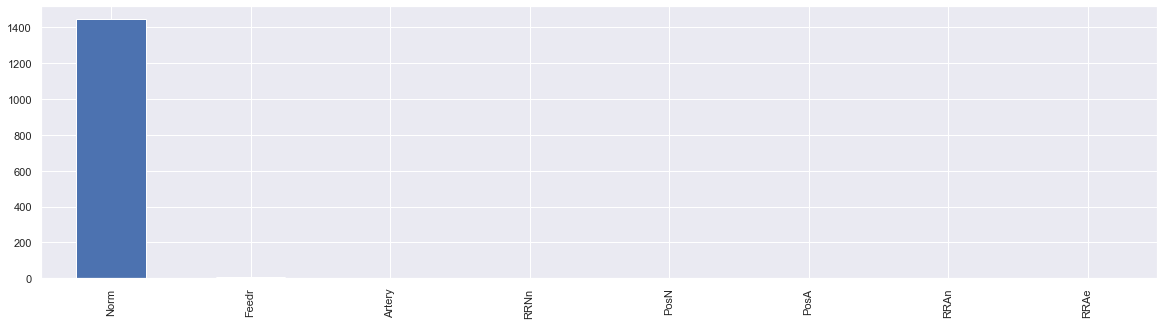

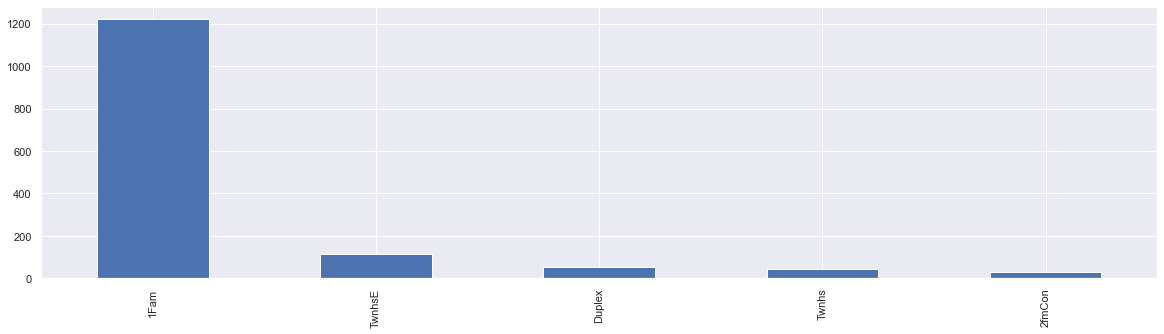

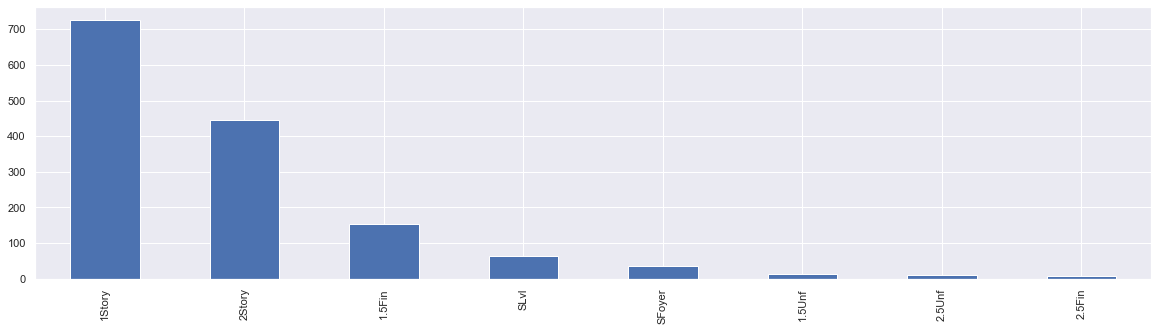

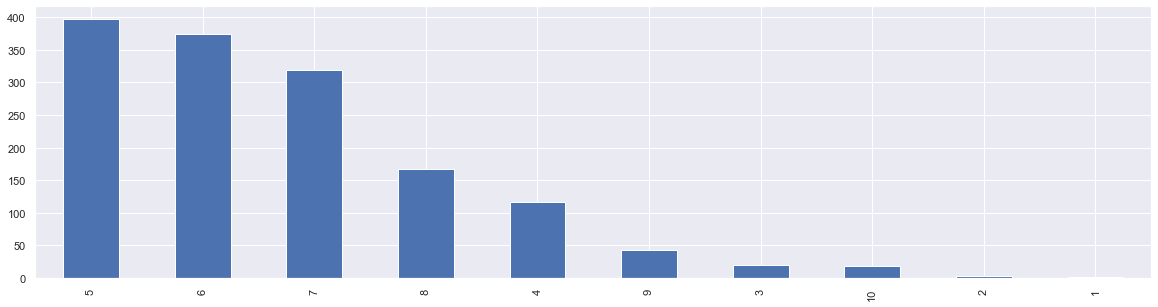

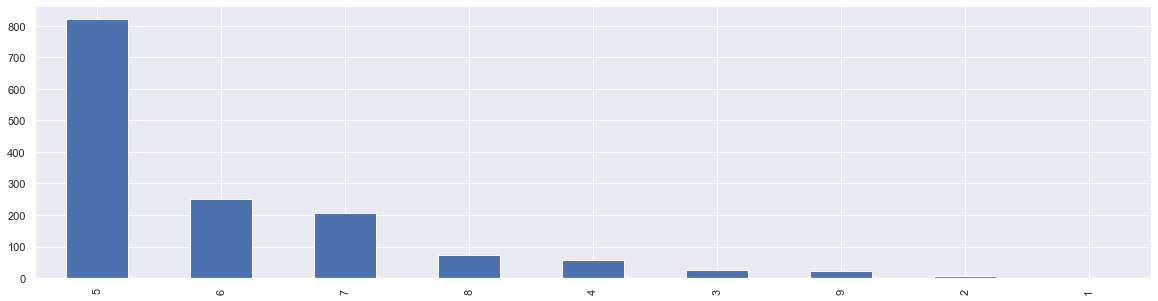

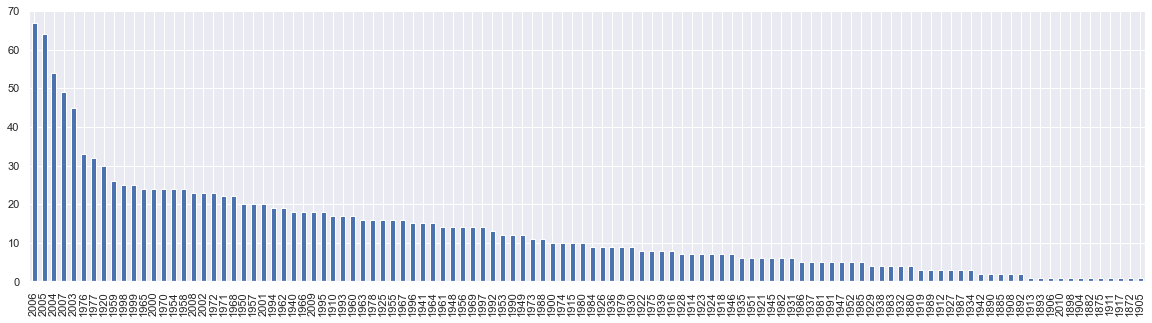

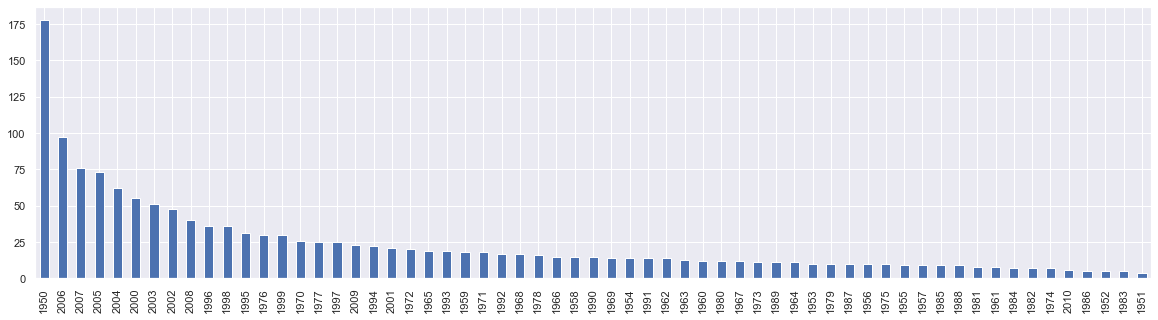

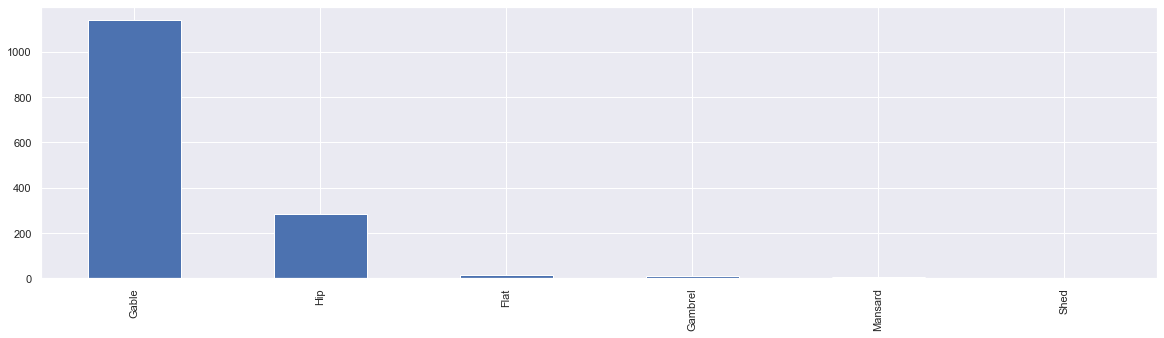

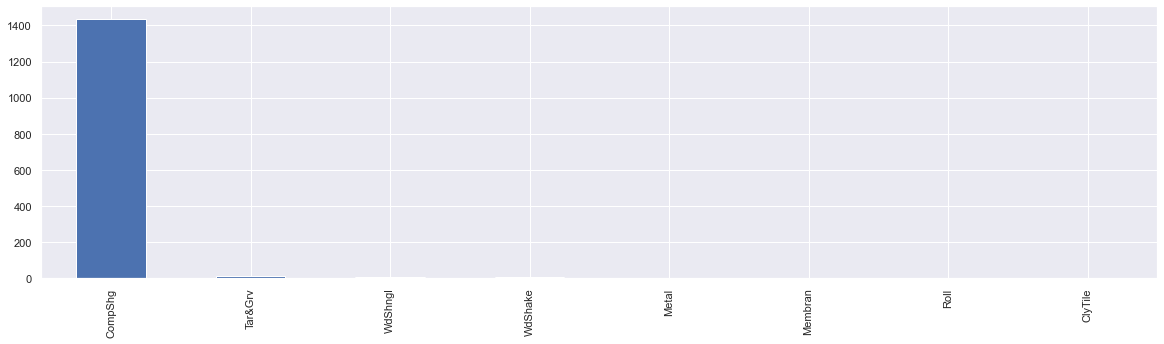

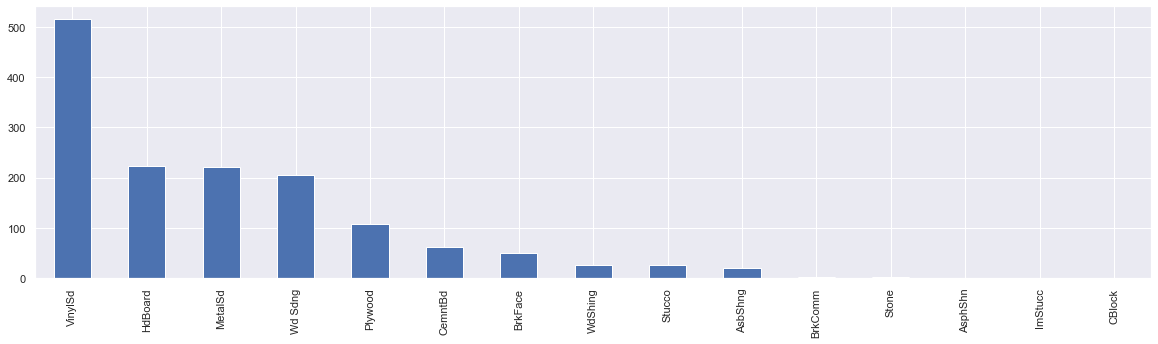

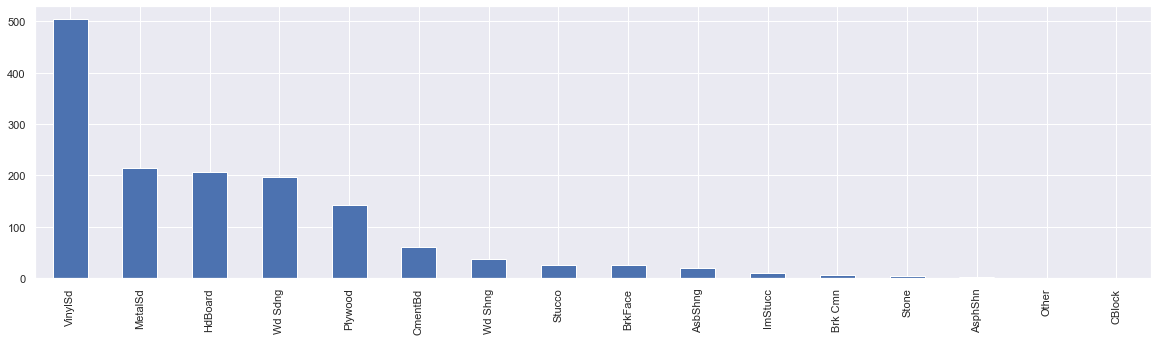

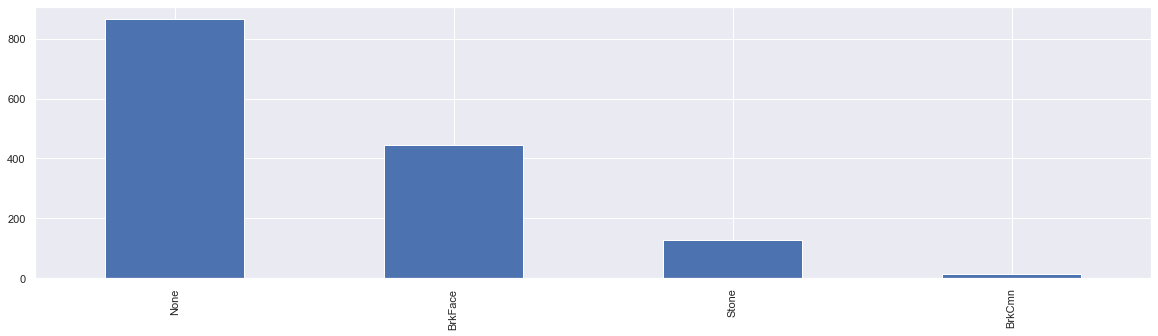

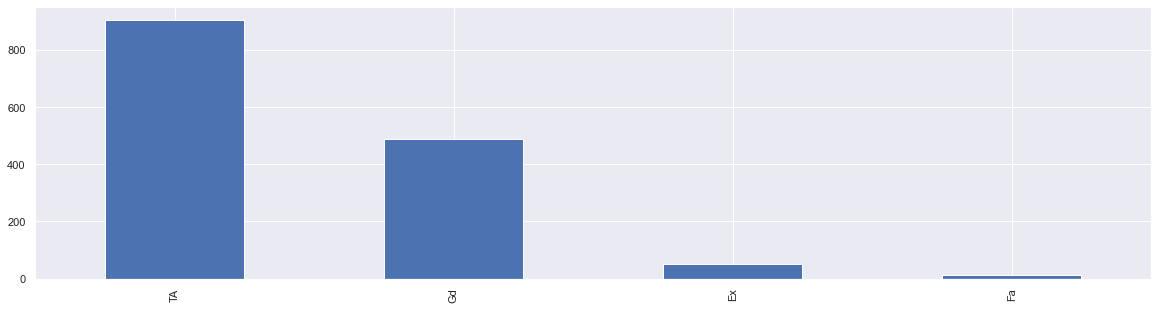

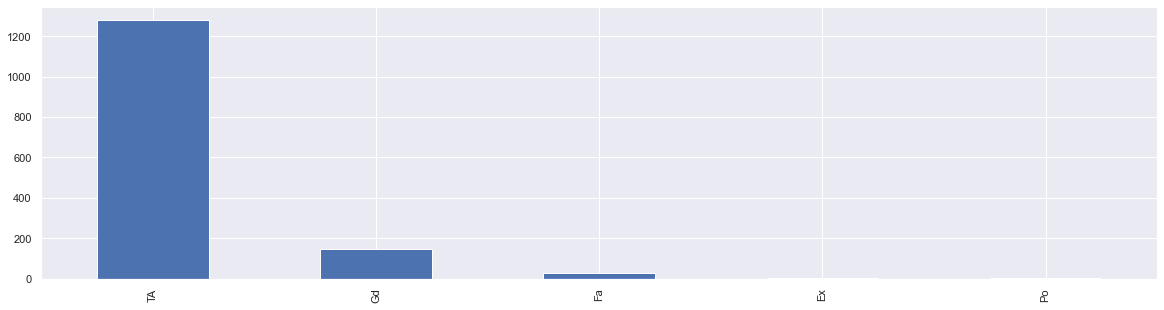

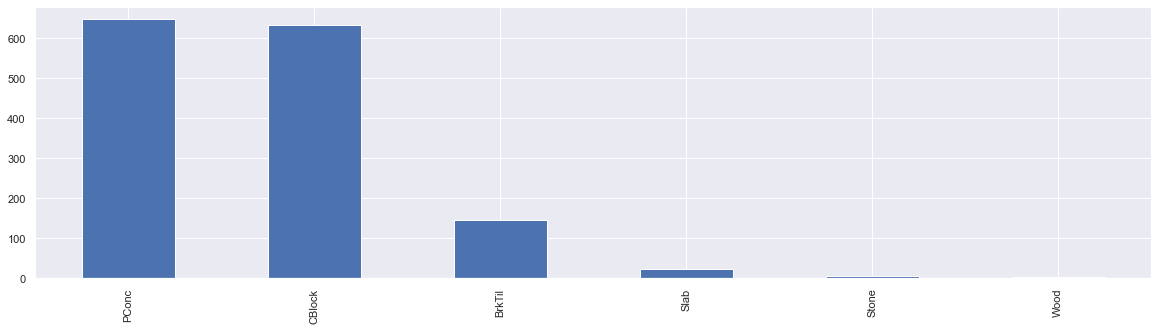

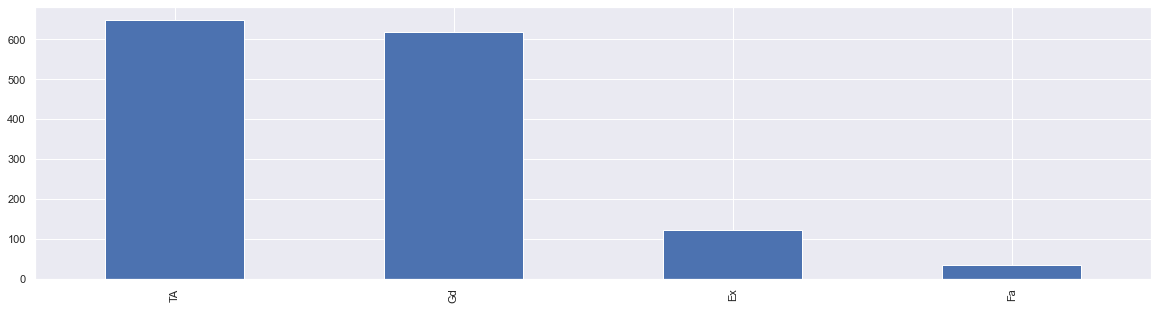

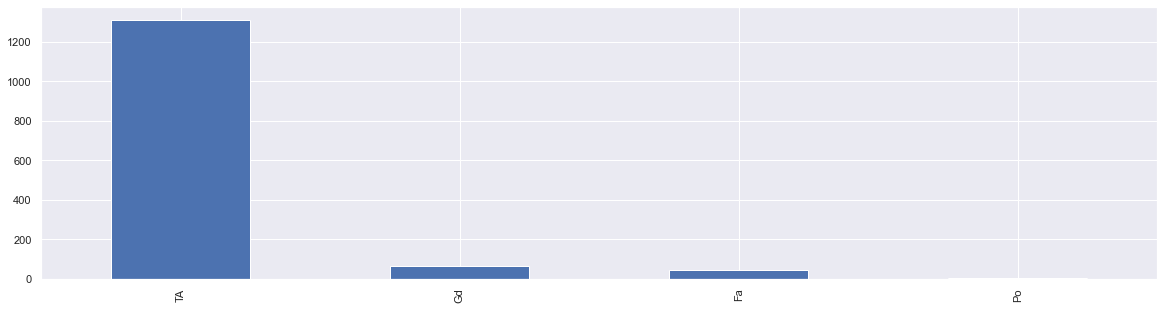

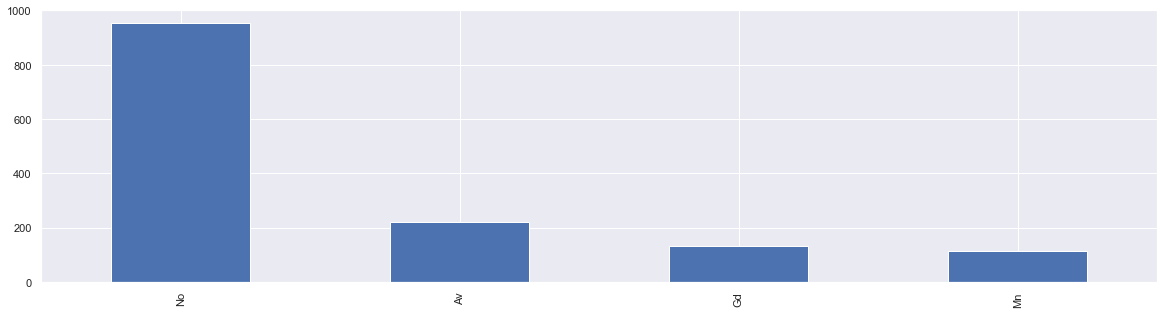

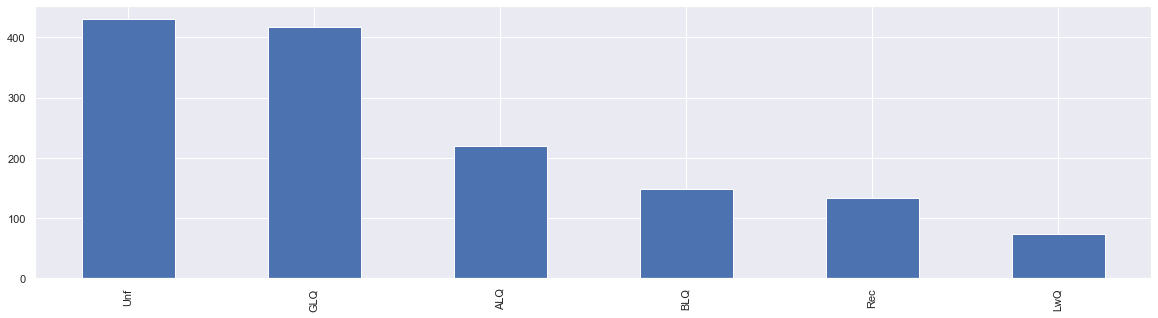

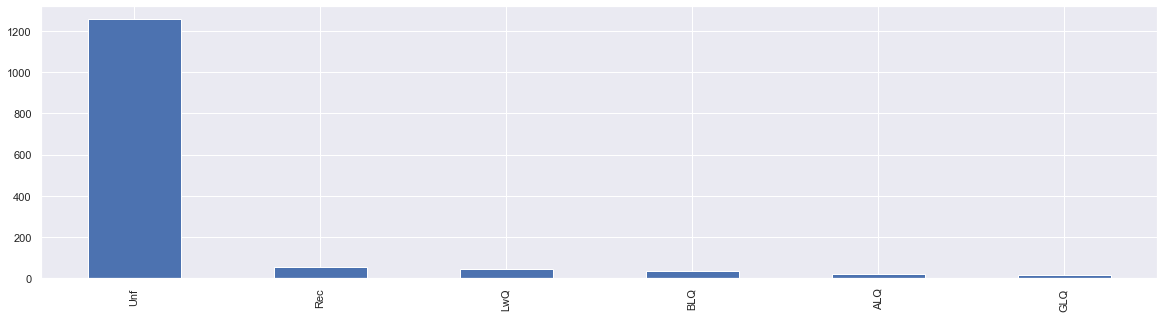

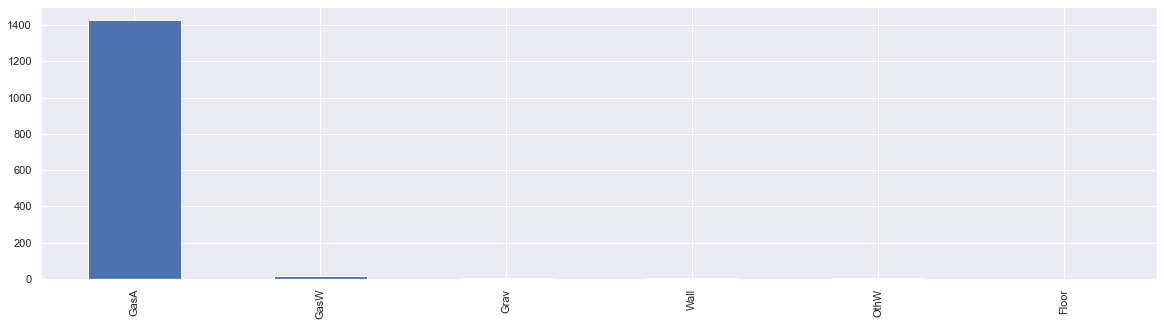

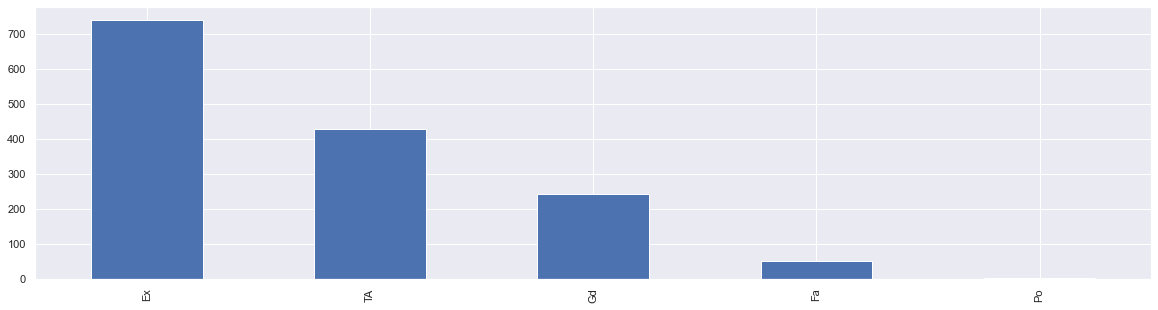

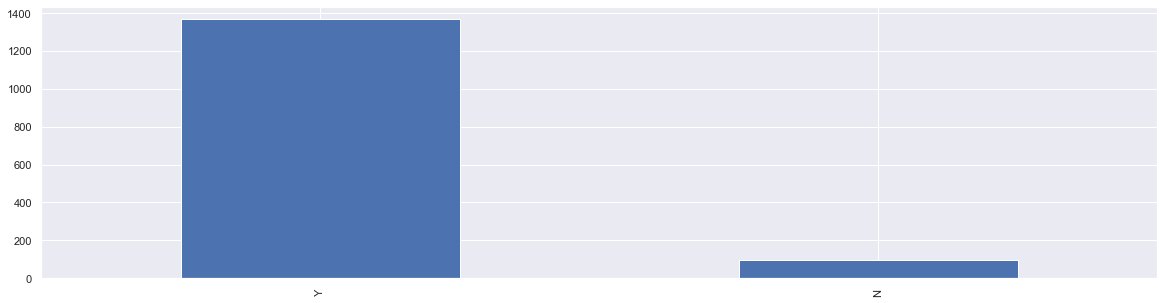

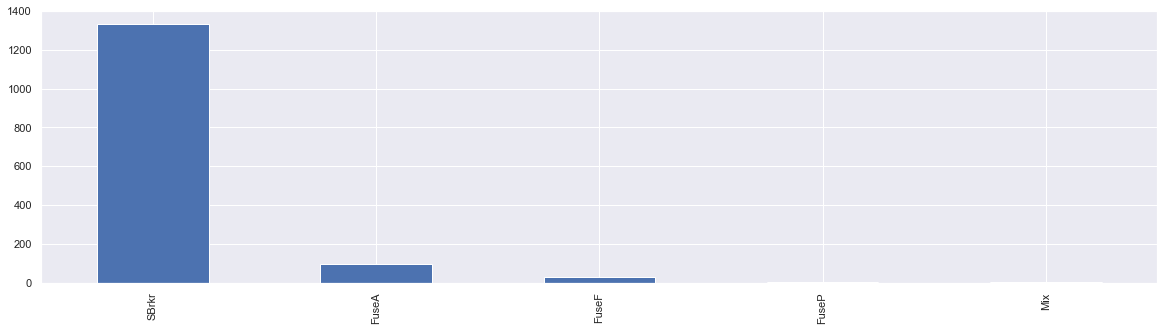

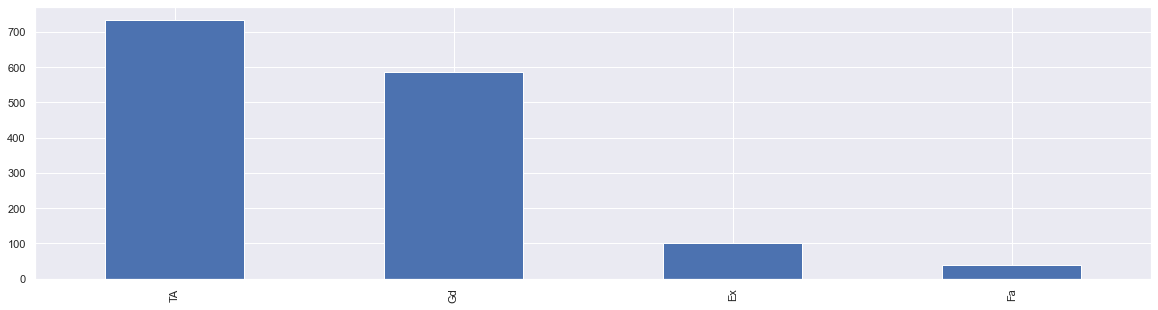

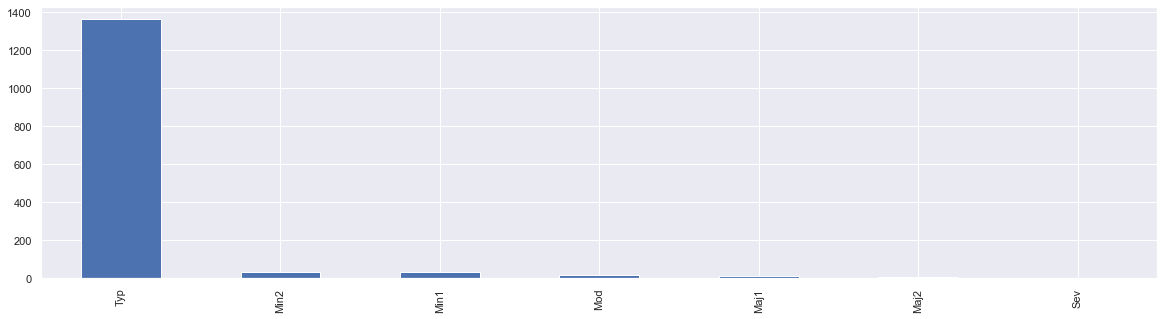

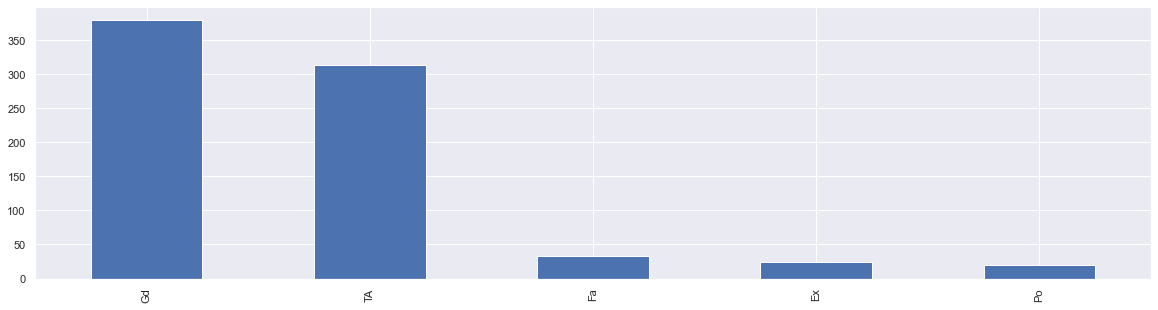

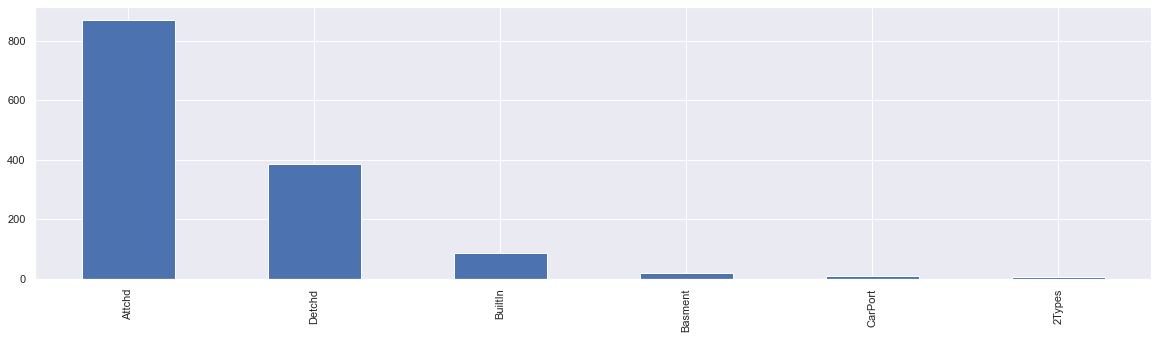

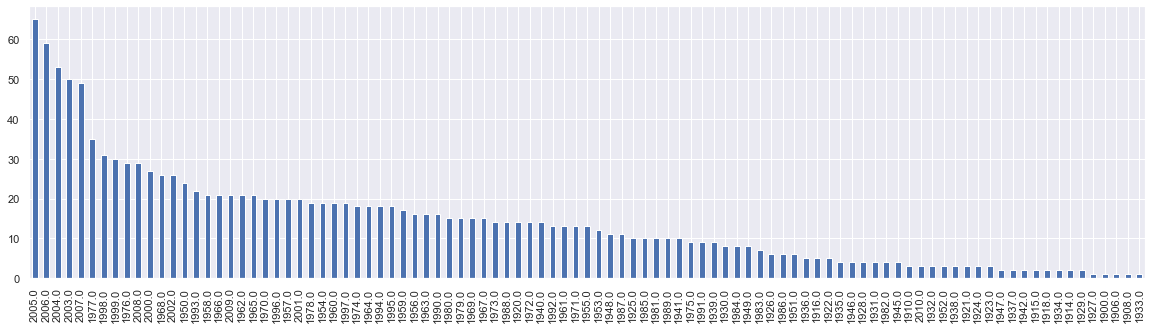

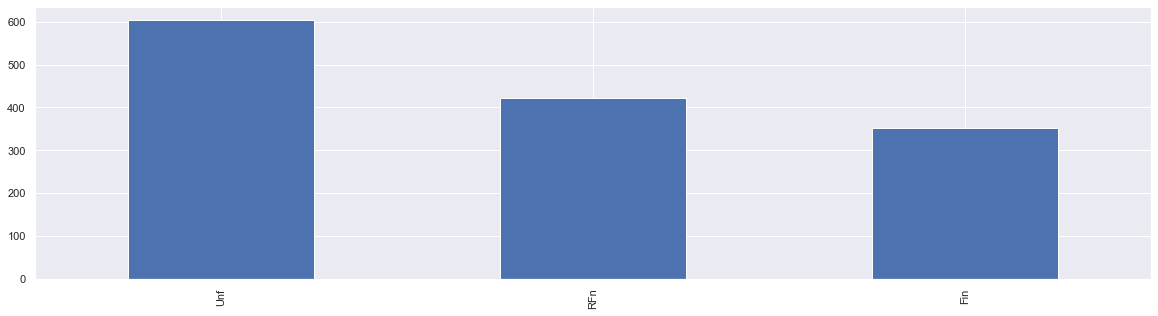

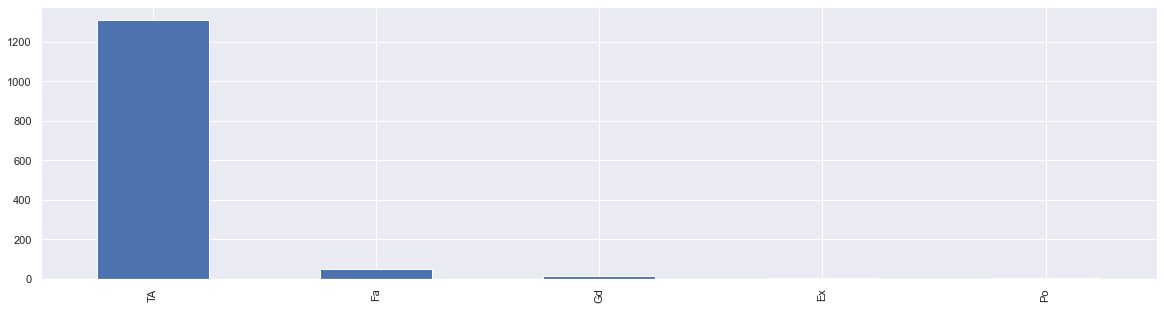

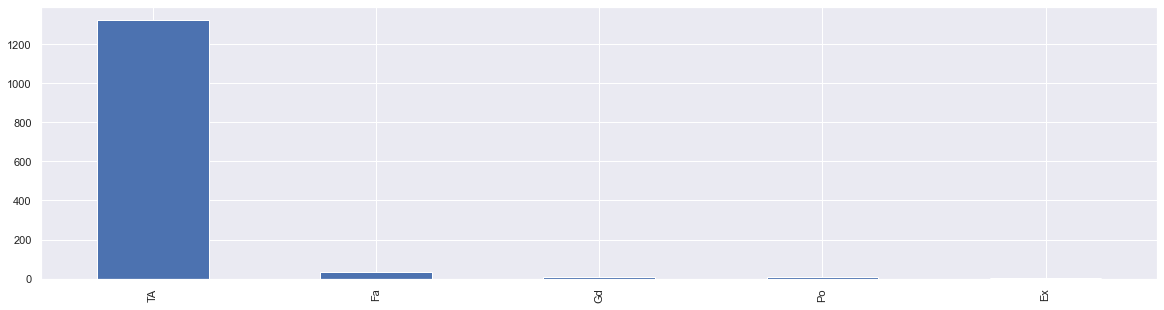

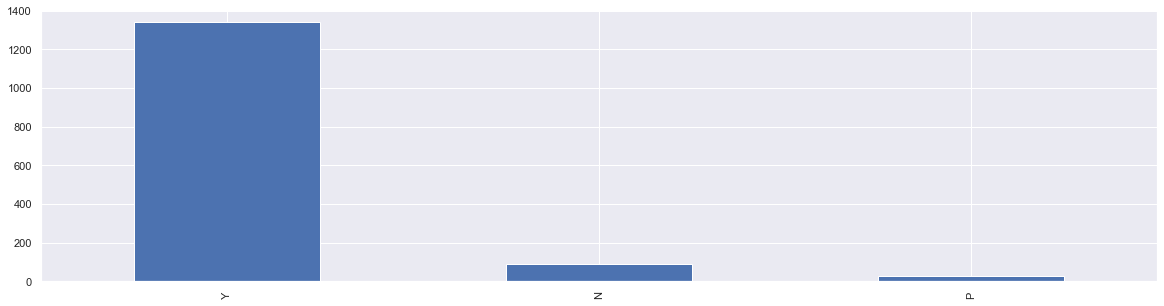

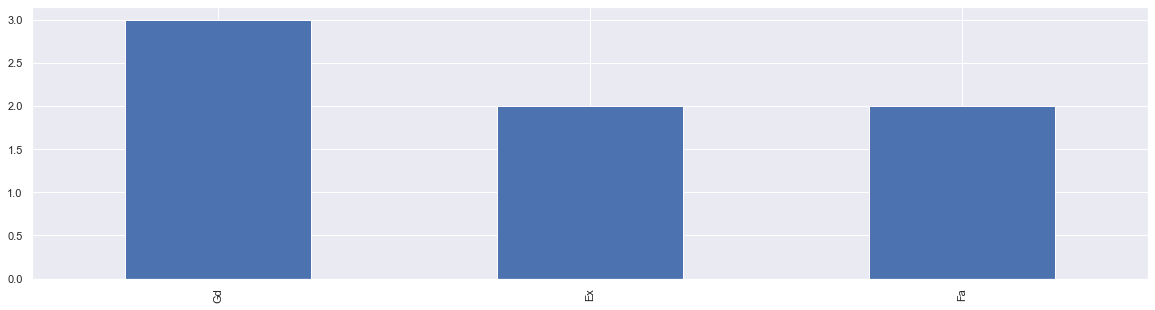

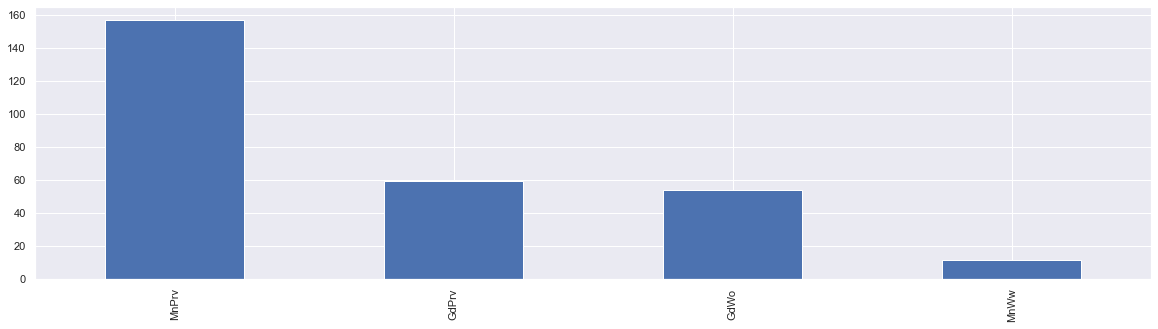

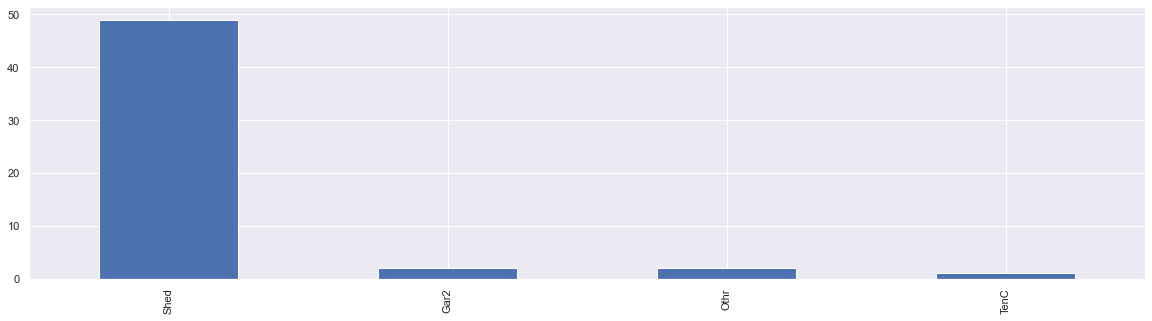

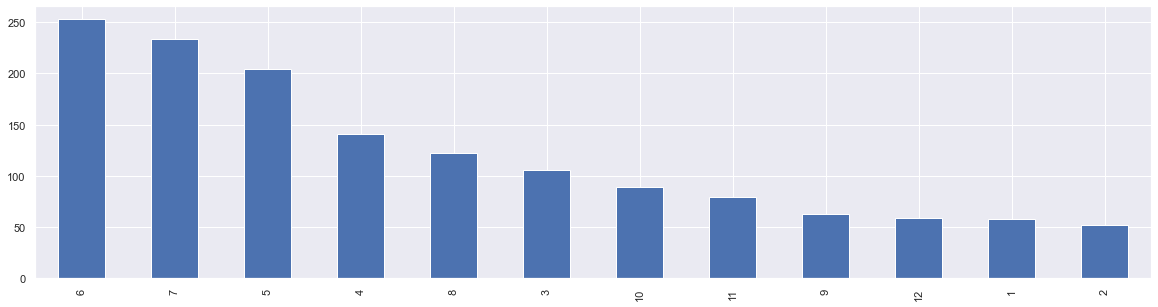

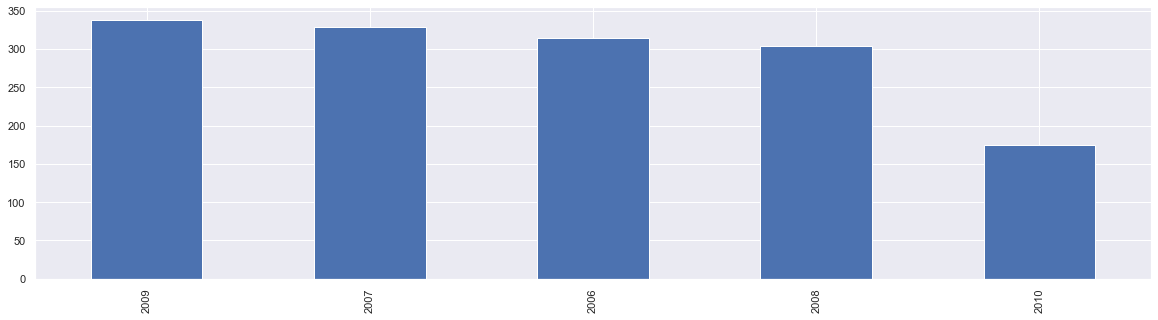

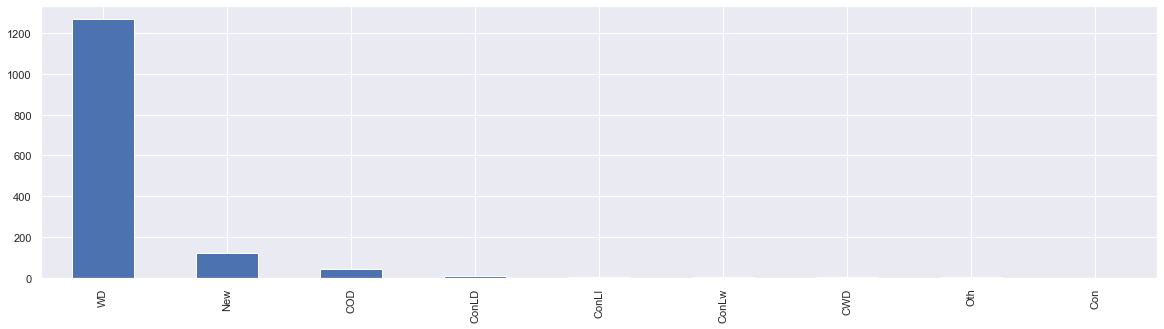

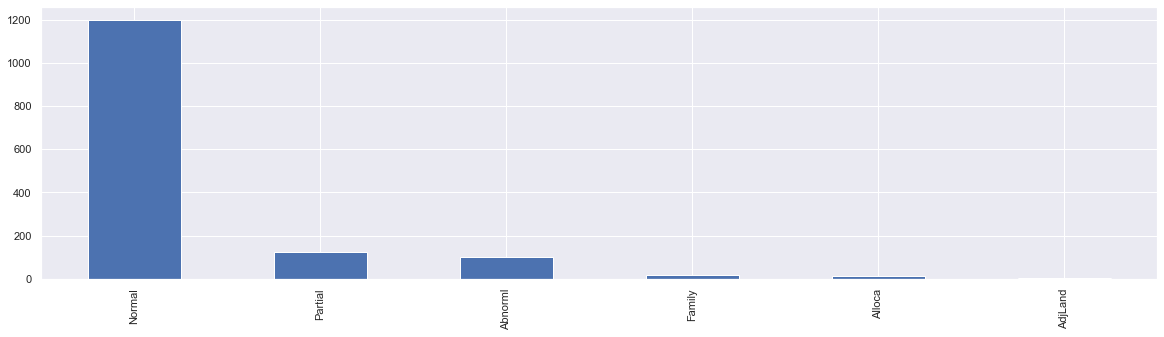

In [96]:
for var in quali_vars:
  plt.figure(figsize=(20,5))
  train_data[var].value_counts().plot(kind='bar')
  plt.show()

### Analizando la variable de interes

In [97]:
#skewness and kurtosis
print('Skewness: %f' % train_data['SalePrice'].skew())
print('Kurtosis: %f' % train_data['SalePrice'].kurt())
print('\n---Describe---')
train_data['SalePrice'].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.8, 0.9, 0.95])

Skewness: 1.882876
Kurtosis: 6.536282

---Describe---


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
65%      187500.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [98]:
stat,p = stats.shapiro(train_data[["SalePrice"]].dropna())
print('Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(train_data[["SalePrice"]].dropna())
print('Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Kolmogorov-Smirnov:
p=0.000000

Lilliefors:
ks=0.123685
p=0.001000


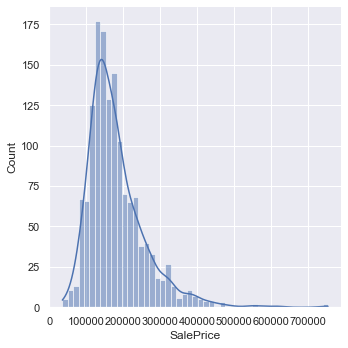

In [99]:
sns.displot(train_data['SalePrice'], kde=True)

<AxesSubplot:xlabel='SalePrice'>

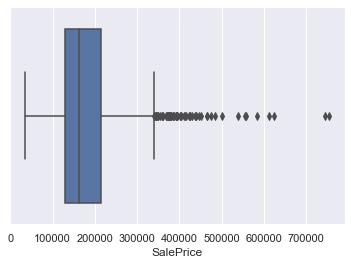

In [100]:
sns.boxplot(x=train_data["SalePrice"])

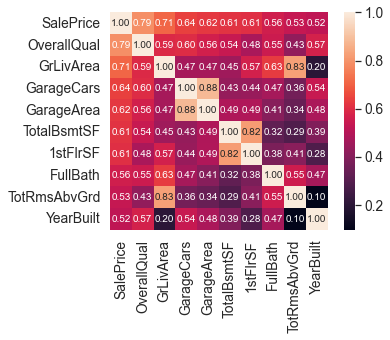

In [101]:
k = 10 #number of variables for heatmap
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

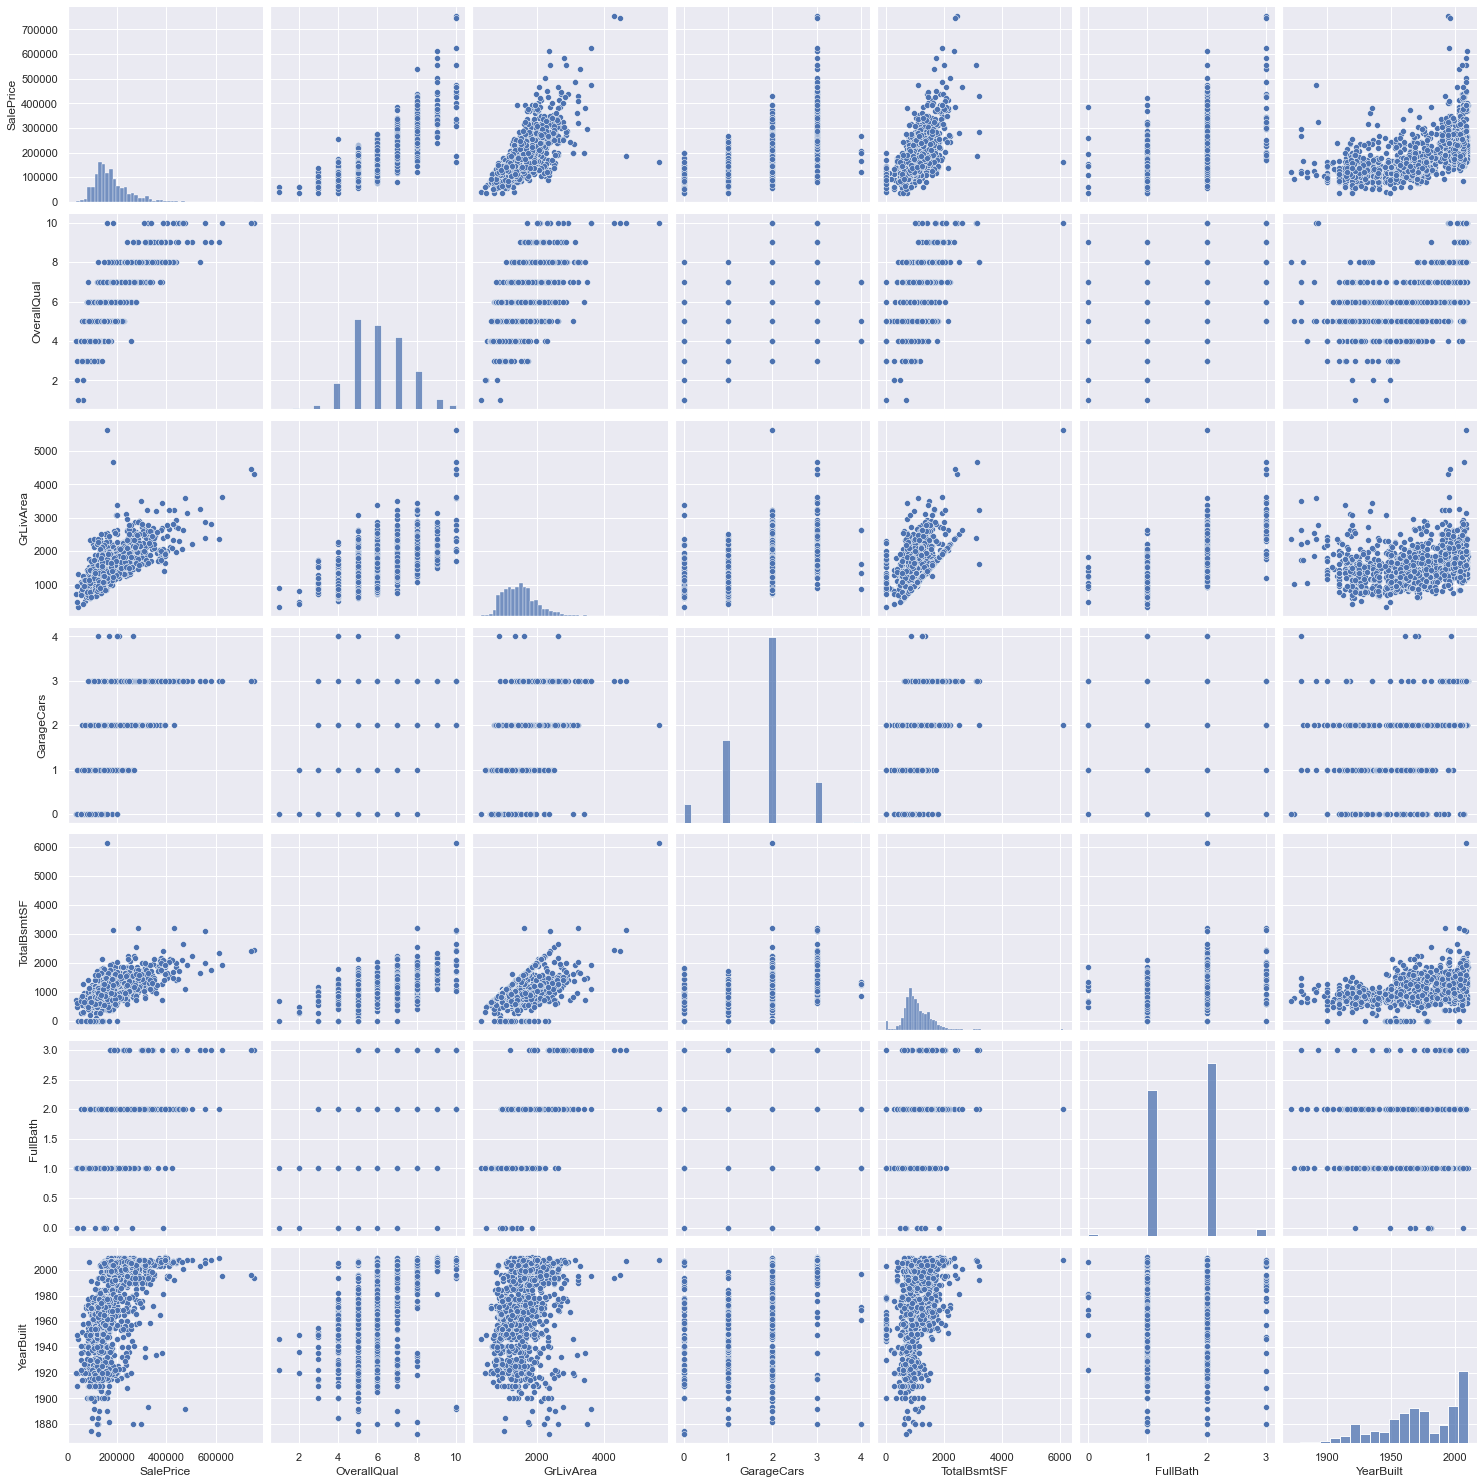

In [102]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], height= 3)
plt.show()

### Missing data

In [103]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


## Modelo de regresión lineal

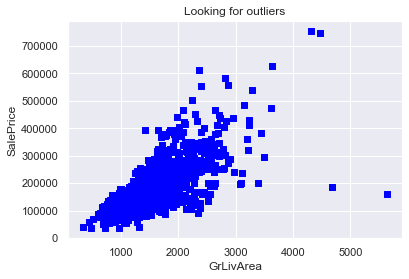

In [104]:
plt.scatter(train_data.GrLivArea, train_data.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()


In [105]:
# Log transform the target for official scoring
train = train_data[train_data.GrLivArea < 4000].copy()
y = train.pop("SalePrice") #La variable respuesta
X = train #El resto de los datos

In [106]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [107]:
s_price = y_train.values.reshape(-1,1)
s_price_t = y_test.values.reshape(-1,1)
gr_area = X_train['GrLivArea'].values.reshape(-1,1)
gr_area_t = X_test['GrLivArea'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(gr_area, s_price)
s_price_pred = lm.predict(gr_area_t)

In [108]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'$SalePrice = %0.4f*GrLiveArea %+0.4f$'%(m,c)
print(label)

$SalePrice = 118.2634*GrLiveArea +3900.7162$


Text(0.5, 1.0, 'Test Set Sale Price vs GrLiveArea')

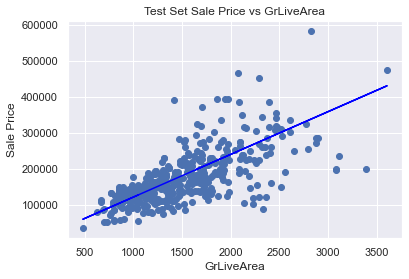

In [109]:
fig = plt.figure()
plt.scatter(gr_area_t, s_price_t)
plt.plot(gr_area_t,s_price_pred, color="blue")
plt.ylabel("Sale Price")
plt.xlabel("GrLiveArea")
plt.title("Test Set Sale Price vs GrLiveArea")

In [110]:
print("Mean Squared Error: %.2f"%mean_squared_error(s_price_t,s_price_pred))
print("R squared: %.2f"%r2_score(s_price_t,s_price_pred))

Mean Squared Error: 3024674960.17
R squared: 0.43
